# Principal Component Analysis

## import library

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [227]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

In [228]:
feature.shape

(50, 2)

## plot the input data

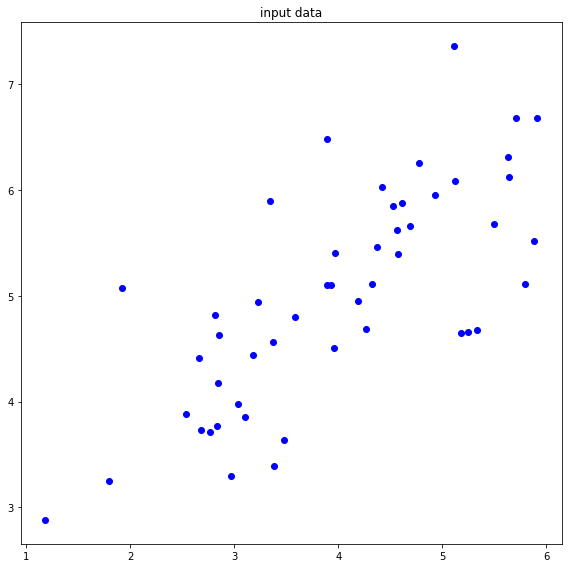

In [229]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
# fill up the blank

num_data1=number_data


plt1_point_0_x=[]
plt1_point_0_y=[]
    
for i in range(num_data1):
    plt1_point_0_x.append(feature[i,0])
    plt1_point_0_y.append(feature[i,1])
        
    
plt.scatter(plt1_point_0_x, plt1_point_0_y, marker='o', color='blue')


# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [230]:

# ===================================================
# fill up the blank

def nomalize(x,y):
    
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY



    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])
    '''
    print("mean of x = {0}\nmean of y = {1}\nstd of x = {2}\nstd of y = {3}"\
         .format(np.mean(x,axis=0),np.mean(y,axis=0),np.std(x,axis=0),np.std(y,axis=0)))
         
    '''
    
    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')


    plt.tight_layout()
    plt.show()

## compute covariance matrix

In [231]:
def compute_covariance(feature):
   
    
    Z = feature
    ZT=Z.T
    
    Sigma = (np.dot(ZT,Z))/feature.shape[0]
        
    
    
    return Sigma

## compute principal directions

In [232]:
def compute_eigen(X):
    
    S,U = np.linalg.eig(X)
    
    
    return S, U

In [237]:
def principal_directions(x,y):

    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature_n)
    
    S,U=compute_eigen(Sigma)
    U=U.T

    plt.figure(figsize=(8,8))
    plt.title('principal directions')


    first=np.max(S)
    f_index = np.where(S==first)
    first_vec = S[f_index]*U[f_index].reshape(-1)

    s_index=S.argsort()[-2]
    second_vec = S[s_index]*U[s_index]

    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')

    plt.arrow(0, 0, first_vec[0], first_vec[1], head_width = .1, head_length = .1, color = 'red')
    plt.arrow(0, 0, second_vec[0], second_vec[1], head_width = .1, head_length = .1, color = 'green')


    plt.tight_layout()
    plt.show()

## first principal axis

In [265]:

# ===================================================
def first_principal_axis(x,y):
    
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature)
    
    S,U=compute_eigen(Sigma)
    U=U.T
    
    first=np.max(S)
    f_index = np.where(S==first)
    first_vec = S[f_index]*U[f_index].reshape(-1)
    
    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')
    
    x_axis=np.arange(-3,3,0.1)
    y_axis=(first_vec[1]*x_axis)/first_vec[0]
    
    
    plt.plot(x_axis,y_axis,color = 'red')
    
    plt.xlim([-2.7, 2]) 
    plt.ylim([-2.5, 2.5]) 
    
    plt.tight_layout()
    plt.show()
# ===================================================


## second principal axis

In [267]:

# ===================================================
def second_principal_axis(x,y):
    
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature)
    
    S,U=compute_eigen(Sigma)
    U=U.T
    
    s_index=S.argsort()[-2]
    second_vec = S[s_index]*U[s_index]
    
    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')
    
    x_axis=np.arange(-3,3,0.1)
    y_axis=(second_vec[1]*x_axis)/second_vec[0]
    
    
    plt.plot(x_axis,y_axis,color = 'red')
    
    plt.xlim([-2.7, 2]) 
    plt.ylim([-2.5, 2.5]) 
    
    plt.tight_layout()
    plt.show()


## compute the projection of point onto the line

In [274]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    x=feature[:,0]
    y=feature[:,1]
    
    v0=vector[0]
    v1=vector[1]
    # y = (vec[1]/vector[0])x 니까
    # y = -(vec[0]/vector[1])(x-x값) + y값
    # -(vec[0]/vector[1])(x-x값) + y값 = (vec[1]/vector[0])x
    
    meet_x = ((v0/v1*x)+y)/((v0/v1)+(v1/v0))
    meet_y = meet_x * (v1/v0)
    
    projection=np.r_[[meet_x], [meet_y]].T
    
    # ===================================================
    return projection

## projcet to the first principal axis

In [277]:

# ===================================================
def projection_first(x,y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature)
    
    S,U=compute_eigen(Sigma)
    U=U.T
    
    first=np.max(S)
    f_index = np.where(S==first)
    first_vec = S[f_index]*U[f_index].reshape(-1)
    
    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')
    
    x_axis=np.arange(-3,3,0.1)
    y_axis=(first_vec[1]*x_axis)/first_vec[0]
    
    projection = compute_projection_onto_line(feature_n, first_vec)
    
    mx = projection[:,0]
    my = projection[:,1]
    
    plt1_point_mx=[]
    plt1_point_my=[]
    
    for i in range(num_data1):
        plt1_point_mx.append(mx[i])
        plt1_point_my.append(my[i])
        
    plt.scatter(plt1_point_mx, plt1_point_my, marker='o', color='green')
    
    
    plt.plot(x_axis,y_axis,color = 'red')
    
    plt.xlim([-2.7, 2]) 
    plt.ylim([-2.5, 2.5]) 
    
    plt.tight_layout()
    plt.show()
    


## projcet to the second principal axis

In [279]:

# ===================================================
def projection_second(x,y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature)
    
    S,U=compute_eigen(Sigma)
    U=U.T
    
    s_index=S.argsort()[-2]
    second_vec = S[s_index]*U[s_index]
    
    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')
    
    x_axis=np.arange(-3,3,0.1)
    y_axis=(second_vec[1]*x_axis)/second_vec[0]
    
    projection = compute_projection_onto_line(feature_n, second_vec)
    
    mx = projection[:,0]
    my = projection[:,1]
    
    plt1_point_mx=[]
    plt1_point_my=[]
    
    for i in range(num_data1):
        plt1_point_mx.append(mx[i])
        plt1_point_my.append(my[i])
        
    plt.scatter(plt1_point_mx, plt1_point_my, marker='o', color='green')
    
    
    plt.plot(x_axis,y_axis,color = 'red')
    
    plt.xlim([-2.7, 2]) 
    plt.ylim([-2.5, 2.5]) 
    
    plt.tight_layout()
    plt.show()


## connect original data to the projection onto the first principal axis

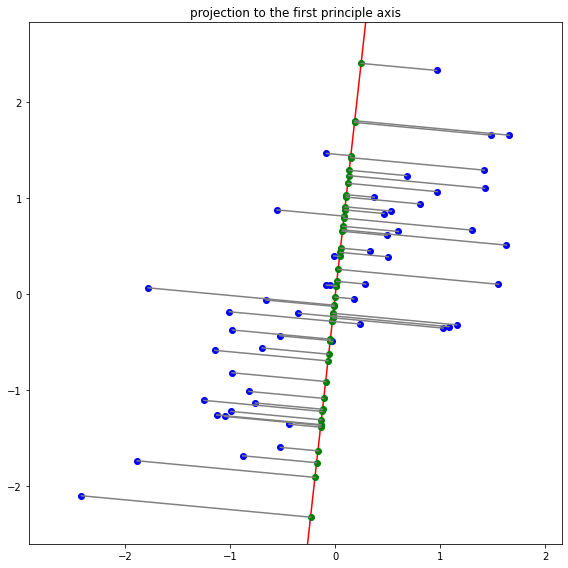

In [24]:

# ===================================================
def cnt_projection_first(x,y):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    
    meanX=np.mean(x,axis=0)
    meanY=np.mean(y,axis=0)

    stdX=np.std(x,axis=0)
    stdY=np.std(y,axis=0)



    x_n=(x-meanX)/stdX
    y_n=(y-meanY)/stdY

    
    
    feature_n=np.r_[[x_n], [y_n]].T
    
    Sigma = compute_covariance(feature)
    
    S,U=compute_eigen(Sigma)
    U=U.T
    
    first=np.max(S)
    f_index = np.where(S==first)
    first_vec = S[f_index]*U[f_index].reshape(-1)
    
    plt1_point_0_x_n=[]
    plt1_point_0_y_n=[]
    
    for i in range(num_data1):
        plt1_point_0_x_n.append(x_n[i])
        plt1_point_0_y_n.append(y_n[i])

    plt.scatter(plt1_point_0_x_n, plt1_point_0_y_n, marker='o', color='blue')
    
    x_axis=np.arange(-3,3,0.1)
    y_axis=(first_vec[1]*x_axis)/first_vec[0]
    
    projection = compute_projection_onto_line(feature_n, first_vec)
    
    mx = projection[:,0]
    my = projection[:,1]
    
    plt1_point_mx=[]
    plt1_point_my=[]
    
    for i in range(num_data1):
        plt1_point_mx.append(mx[i])
        plt1_point_my.append(my[i])
        
    plt.scatter(plt1_point_mx, plt1_point_my, marker='o', color='green')
    
    for i in range(num_data1):
        plt.plot([x_n[i],mx[i]],[,my[i]])
        plt1_point_my.append(my[i])
    
    
    plt.plot(x_axis,y_axis,color = 'red')
    
    plt.xlim([-2.7, 2]) 
    plt.ylim([-2.5, 2.5]) 
    
    plt.tight_layout()
    plt.show()
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

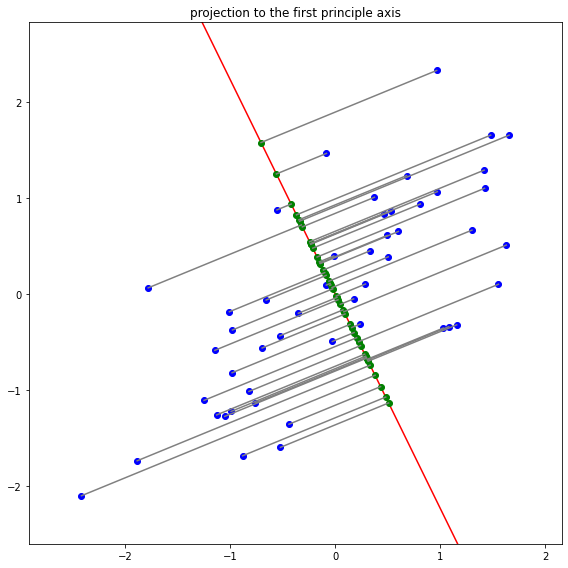

In [25]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

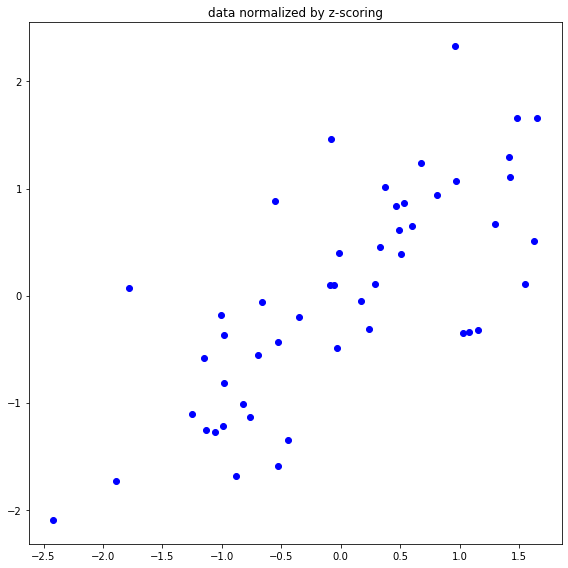

In [235]:
nomalize(x,y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

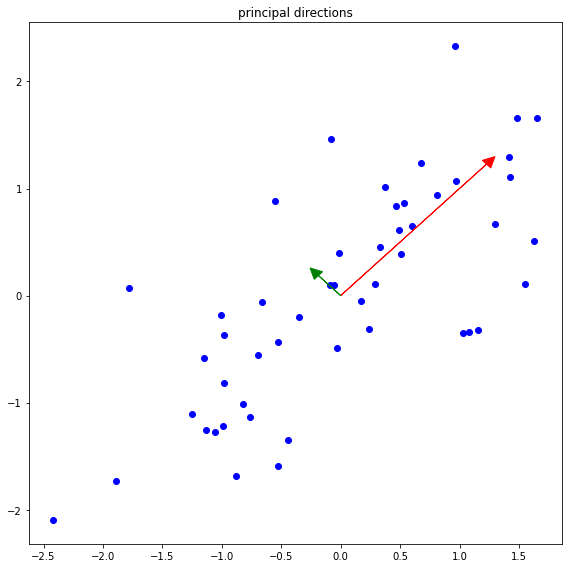

In [239]:
principal_directions(x,y)

***

### 3. plot the first principal axis in red on the normalized data in blue

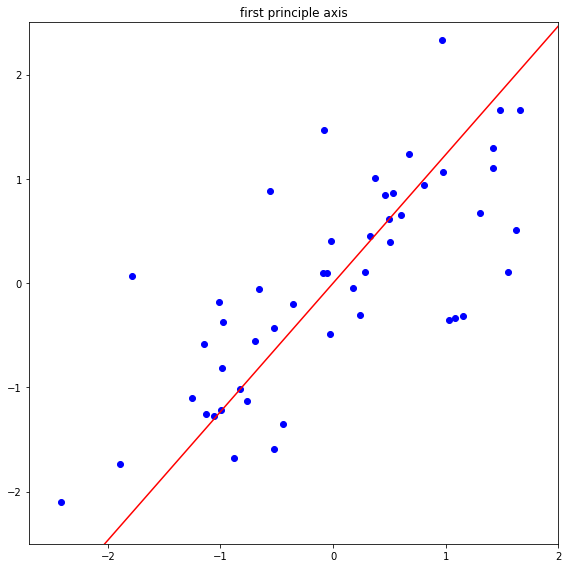

In [266]:
first_principal_axis(x,y)

***

### 4. plot the second principal axis in red on the normalized data in blue

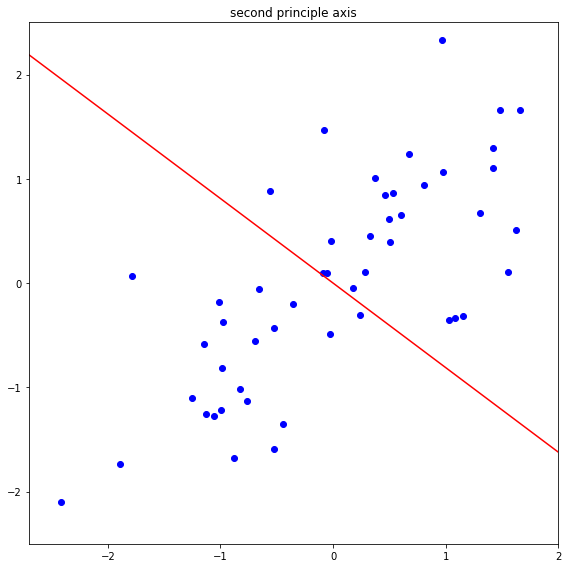

In [268]:
second_principal_axis(x,y)

***

### 5. plot the projection of data in green onto the first principal axis in red

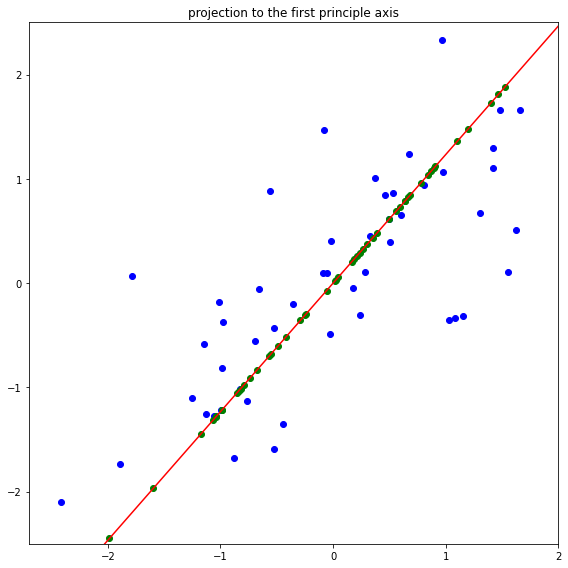

In [281]:
projection_first(x,y)

***

### 6. plot the projection of data in green onto the second principal axis in red

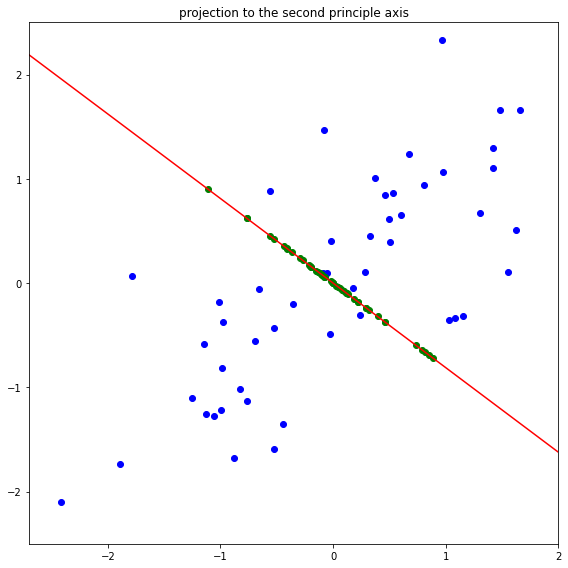

In [280]:
projection_second(x,y)

***

### 7. plot the projection line in grey onto the first principal axis

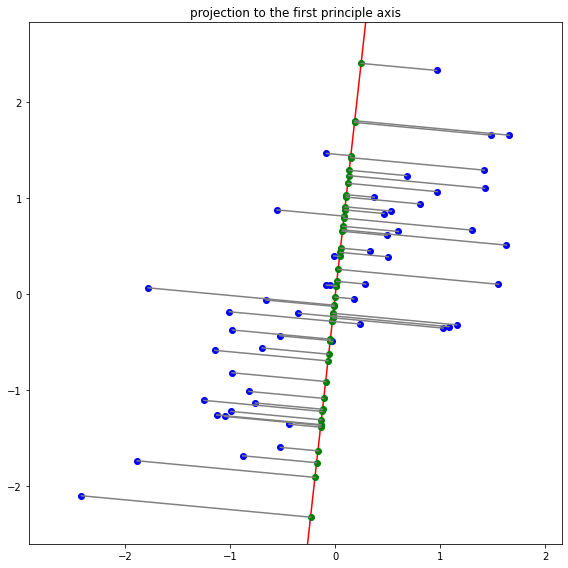

***

### 8. plot the projection line in grey onto the second principal axis

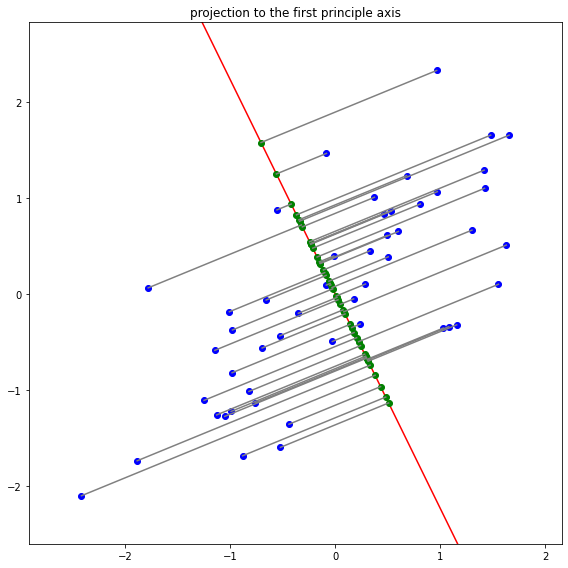

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***